<a href="https://colab.research.google.com/github/angelomarcelino/machine_learning/blob/main/q4_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importações


In [12]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import seaborn as sns
sns.set_style('whitegrid')

# Questão 4
Considere uma rede deep learning convolutiva (treinada) aplicada à classificação de padrões em imagens. A base de dados considerada é a CIFAR-10 (pesquise). A referida base de dados consiste de 60 mil imagens coloridas de 32x32 pixels, com 50 mil para treino e 10 mil para teste. As imagens estão divididas em 10 classes, a saber: avião, navio, caminhão, automóvel, sapo, pássaro, cachorro, gato, cavalo e cervo. Cada imagem possui apenas um dos objetos da classe de interesse, podendo estar parcialmente obstruído por outros objetos que não pertençam a esse conjunto. Apresente os resultados da classificação em uma matriz de confusão.

Obs. Pesquise e utilize uma rede convolutiva já treinada

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizar valores dos pixels entre 0 e 1
train_images, test_images = train_images / 255.0, test_images / 255.0

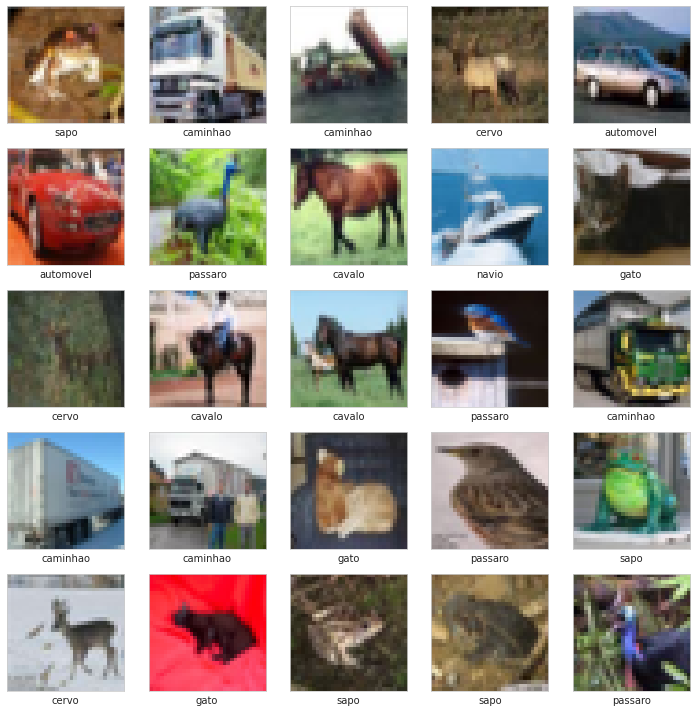

In [23]:
class_names = ['aviao', 'automovel', 'passaro', 'gato', 'cervo',
               'cao', 'sapo', 'cavalo', 'navio', 'caminhao']

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])

plt.tight_layout()
plt.savefig('exemplos.eps')

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10))


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20,
                    validation_split=0.1,
                    #validation_data=(test_images, test_labels),
                    )

Epoch 1/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6803 - accuracy: 0.3733 - val_loss: 1.3350 - val_accuracy: 0.5046
Epoch 2/20
1407/1407 [==============================] - 5s 3ms/step - loss: 1.3338 - accuracy: 0.5246 - val_loss: 1.1320 - val_accuracy: 0.5928
Epoch 3/20
1407/1407 [==============================] - 5s 3ms/step - loss: 1.1813 - accuracy: 0.5864 - val_loss: 1.1451 - val_accuracy: 0.5958
Epoch 4/20
1407/1407 [==============================] - 5s 3ms/step - loss: 1.0801 - accuracy: 0.6222 - val_loss: 0.9869 - val_accuracy: 0.6574
Epoch 5/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.9982 - accuracy: 0.6539 - val_loss: 0.9302 - val_accuracy: 0.6724
Epoch 6/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.9406 - accuracy: 0.6748 - val_loss: 0.8976 - val_accuracy: 0.6866
Epoch 7/20
1407/1407 [==============================] - 5s 4ms/step - loss: 0.8875 - accuracy: 0.6939 - val_loss: 0.8680 - val_accuracy:

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


313/313 - 1s - loss: 0.9586 - accuracy: 0.7034


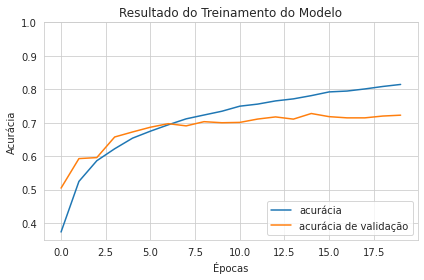

In [30]:
plt.plot(history.history['accuracy'], label='acurácia')
plt.plot(history.history['val_accuracy'], label = 'acurácia de validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.ylim([0.35, 1])
plt.legend(loc='lower right')
plt.title("Resultado do Treinamento do Modelo")
plt.tight_layout()
plt.savefig("result_cifar.eps")

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [8]:
y_pred = model.predict_classes(test_images)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [33]:
import itertools

def plot_conf_matrix(conf_matrix, title, ax):  
    cax = ax.matshow(conf_matrix, cmap='magma')

    thresh = 200
    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):   
            ax.text(
                j, i, '{:,}'.format(conf_matrix[i, j]),
                horizontalalignment='center',
                fontsize=14,
                color='black' if conf_matrix[i, j] > thresh else 'white'
            )
    
    fig.colorbar(cax, ax=ax)
    labels = class_names
    ax.set_xticks(range(len(labels)))
    ax.set_yticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45)
    ax.set_yticklabels(labels)
    

    accuracy = np.trace(conf_matrix) / float(np.sum(conf_matrix))
    misclass = 1 - accuracy
    ax.set_title(f'{title}\nAcurácia: {accuracy*100:0.2f}%\n')

    ax.set_xlabel('Predito')
    ax.set_ylabel('Real')

    plt.tight_layout()
    plt.savefig('cifar-confusao.png')



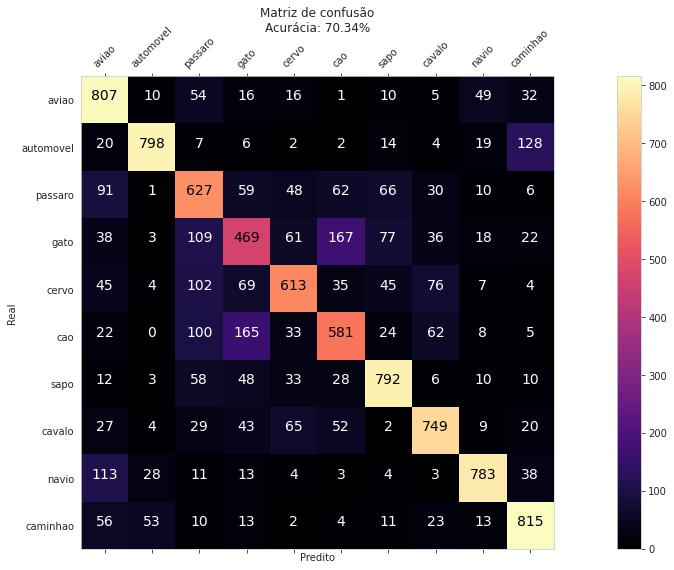

In [34]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_labels, y_pred)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))
plt.grid(False)

plot_conf_matrix(conf_matrix, "Matriz de confusão", axes)